# Bayes formula

$$
P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)}
$$

Usually,

$$
P(X) = \sum_{Y_i}  P(X|Y_i)P(Y_i)
$$

# The Taxicab Problem

A cab was involved in a hit and run accident at night. Two cab companies, the Green and the Blue, operate in the city. 85% of the cabs in the city are Green and 15% are Blue.

A witness identified the cab as Blue. The court tested the reliability of the witness under the same circumstances that existed on the night of the accident and concluded that the witness correctly identified each one of the two colors 80% of the time and failed 20% of the time.

What is the probability that the cab involved in the accident was Blue rather than Green knowing that this witness identified it as Blue?

|            | green | blue |
| :---------------- | :------: | ----: |
| right        |   0.8   | 0.8 |
| wrong           |   0.2   | 0.2 |

$$
P(\texttt{blue} ) = 0.15\\
P(\texttt{green} ) = 0.85
$$

$$
$$


$$
P(\texttt{blue}|\texttt{witness  saw blue}) = \cdots
$$
$$
P(\texttt{green}|\texttt{witness  saw blue}) = \cdots
$$

# Bayesian classifier


We have data samples $x_1 \dots x_n$, corresponding classes $y_1 \dots y_d$

We are talking about **Probabilistic classification**

$$
\hat{y} = \arg\max{p(y | x_i )}
$$

Again, Bayessian formula

$$
\hat{y} = \arg\max{\frac{P(X|Y)P(Y)}{\sum_{Y_i}  P(X|Y_i)P(Y_i)}}
$$

Where $P(Y)$ - prior , $P(X|Y)$ - class model


Getting back to  taxicab problem, where is the prior/ class model?



# Independence assumption

- Suppose we have observation $x_j$ with several features $x^1 \ \dots x^n$. How to compute $P(x_j|y)$? It turns out we need to compute $P(x^1 \ \dots x^n|y)$

- for example we have two events:
 - go to the beach (A)
 - get a sunburn (B)
    

These events **are not independent**!! P(A , B) > P(A)P(B) !


    But what if we go to the beach in Scotland in Winter?
    
Thus we obtain the factor **H**, and A and B become independent given that this factor!
    P(A, B |H) = P(A|H)P(B|H)

- assume $x^1 \ \dots x^n$ **conditionally independent**
$$
P(x^1 \ \dots x^n|y)  = \prod_{i}^n P(x^i|y)
$$

## Another example

- Suppose we want to meet mice. The  hours we spend on work does not affect the number of mice you meet. These two magnitudes **are independent** untill..

  
    YOU ARE experimenter bilogist!

    The more you work the more mice you see!

But if you are theorist bilogist you don't see any mice... regardless the hours you spend at work =(((



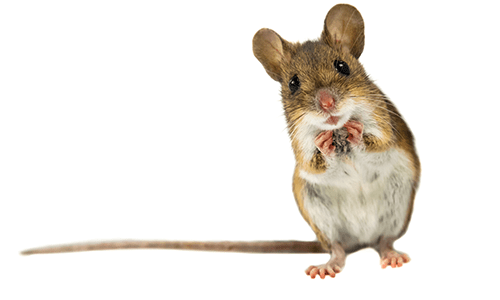 ![image.png](attachment:image.png)



# Gaussian NB

That's simple -  class model is Gaussian

$$p(x|  \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp
\left(- \frac{(x - \mu)^2}{2\sigma^2}\right)$$

# MAXIMUM LIKELIHOOD

suppose we have probability model $p(x | \alpha)$. We need to estimate its parameters, so our model describes data ($x_i$) well. That's how we obtain optimization problem
$$
\alpha_{ML} = \arg\max {\prod_{i} p(x_i | \alpha)}
$$

What if we have $p(x | \mu, \sigma) = \frac{1}{2 \pi \sigma^2} \exp - \frac{(x_i - \mu)^2}{2\sigma^2}$ ?


# WHERE NAIVE BAYES BREAKS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
random_state = 170
n_samples = 1400
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state, centers=[[0,0]])
transformation = [[0.6, -0.6], [0.4, -0.9]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

In [ ]:
random_state = 170
X_, y_ = datasets.make_blobs(n_samples=n_samples, random_state=random_state, centers=[[0,0]])
y_ = y_ + 1
X_aniso_ = np.zeros_like(X_aniso)
X_aniso_[:, 1] = -X_aniso[:, 1]
X_aniso_[:, 0] = X_aniso[:, 0]
aniso_ = (X_aniso_, y_)

In [ ]:
X = np.concatenate((X_aniso, X_aniso_))
y = np.concatenate((y, y_))

In [ ]:
aniso = (X, y)

In [ ]:
colors = np.array(['blue', 'red', 'yellow'])

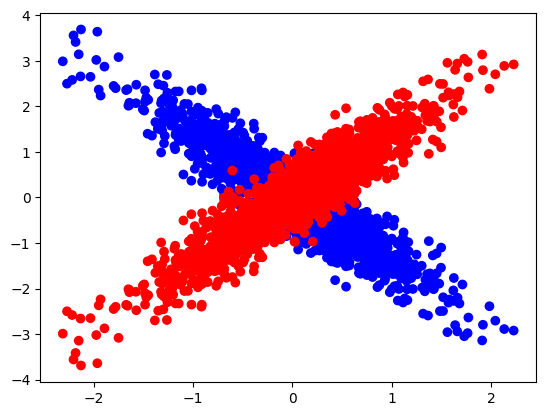

In [ ]:
plt.scatter(aniso[0][:,0], aniso[0][:,1], c = colors[aniso[1]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(aniso[0], aniso[1], test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 1400 points : 558


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knn_pred = neigh.fit(X_train, y_train).predict(X_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != knn_pred).sum()))

Number of mislabeled points out of a total 1400 points : 199


# Implement Gaussian NB

In [ ]:
a =np.array([10,20,30,40,50])
for i, el in enumerate(a):
  print(i, el)

0 10
1 20
2 30
3 40
4 50


In [ ]:
b = np.array([100,200,300,400,500])
for ind, (aa, bb) in enumerate(zip(a,b)):
  print(ind, aa,bb)

0 10 100
1 20 200
2 30 300
3 40 400
4 50 500


In [ ]:
import numpy as np

In [ ]:
class NaiveBayes():
    def __init__(self):
        self.means = {}
        self.stds = {}
        self.y_unique = []
        self.y_counts = []
        self.len_y = 0

    def fit(self, X, y):
        self.y_unique, self.y_counts = np.unique(y, return_counts=True)
        for c in self.y_unique:
            self.means[c] = np.array(X[y==c].mean(axis=0))
            self.stds[c] = np.array(X[y==0].std(axis=0))
        self.len_y = len(y)

    def predict(self ,X_test):
        y_pred = []
        for X_line in X_test:
            predicted = {}
            for i, c in enumerate(self.y_unique):

                probas = 1

                for j, (mean, std) in enumerate(zip(self.means[c], self.stds[c])):

                    probas = probas * 1/ np.sqrt(2*np.pi*std**2) * np.exp(-(np.array(X_line)[j]-mean)**2/(2*std**2))

                probas *= self.y_counts[i]/self.len_y
                predicted[c] = probas
                lllll;ll

            sum_probas =  0

            for v in predicted.values():
                sum_probas = sum_probas + v


            l = []
            for v in predicted.values():
                v = v /sum_probas
                l.append(v)
            l = np.array(l).T
            cl = np.argmax(l)
            y_pred.append(cl)


        return np.array(y_pred)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification()

In [ ]:
X.shape

(100, 20)

In [ ]:
y.sum()

50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
NB =  NaiveBayes()

In [ ]:
NB.fit(X_train, y_train)

In [ ]:
NB.stds

{0: array([1.06096304, 0.68234503, 0.96893187, 1.09490407, 0.94034759,
        0.87522111, 0.99420293, 0.74121373, 0.83967606, 1.14063363,
        1.14834151, 0.85248156, 0.98371956, 0.75207376, 0.92073893,
        1.02690769, 1.11661504, 0.77984987, 0.63863226, 0.98355063]),
 1: array([1.06096304, 0.68234503, 0.96893187, 1.09490407, 0.94034759,
        0.87522111, 0.99420293, 0.74121373, 0.83967606, 1.14063363,
        1.14834151, 0.85248156, 0.98371956, 0.75207376, 0.92073893,
        1.02690769, 1.11661504, 0.77984987, 0.63863226, 0.98355063])}

In [ ]:
# X_test_line  = X_test[27]
NB.predict(X_test)

3.7372844336540935e-15
2.559292305671333e-21
3.557114053294329e-15
2.307007726745825e-21
6.566938553253093e-14
3.3388571055013406e-16
4.830113397933648e-18
6.726343169064375e-17
2.680326465452385e-11
1.6983537345709845e-11
4.844718485706189e-14
9.21613289101137e-13
1.9912514937795595e-12
4.839698536174404e-13
4.908890492713899e-23
2.084075355254557e-17
6.367328971365182e-15
2.573551134125148e-14
8.492502350816425e-16
6.37146210411864e-15
6.750735137773645e-12
3.3033351102546945e-12
2.666794563149555e-16
3.7647355488776284e-19
7.016109712377385e-15
3.462086203414638e-17
9.61500717395194e-13
5.394785029929448e-13
8.014420182171112e-23
1.5067877257630764e-19
2.1014543889847532e-15
1.2126471632616392e-14
1.4015051178328479e-15
4.030660752045296e-18
6.059745874324475e-19
2.88885635274839e-16
1.7114179652901613e-14
1.481177677393025e-13
7.734585166839233e-15
3.459528593354633e-12
2.9181707685823065e-14
8.374443176662672e-17
9.780250989054979e-15
5.754504202176953e-14
3.36420966320367e-11
1.2

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
NB.evaluate(X_test, y_test)

0.9393939393939394

In [ ]:
y_test[27]

1

# IRIS DATASET

In [ ]:
dataset = datasets.load_iris()

In [ ]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(dataset['data'], dataset['target'], test_size=0.33, random_state=42)

In [ ]:
NB_iris =  NaiveBayes()

In [ ]:
NB_iris.fit(X_train_iris, y_train_iris)

In [ ]:
NB_iris.evaluate(X_test_iris, y_test_iris)

0.98

In [ ]:

NB_iris =  NaiveBayes()
NB_iris.fit(X_train_iris[:,[2,3]], y_train_iris)

<Axes: >

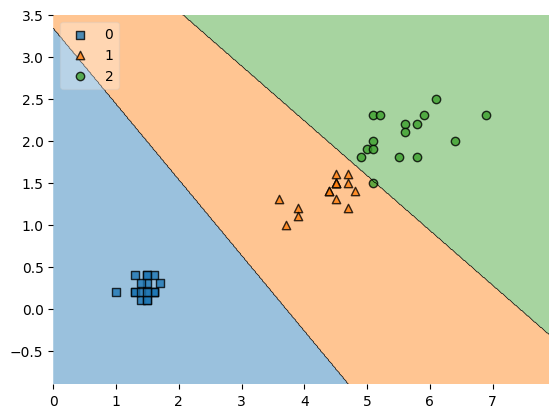

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_test_iris[:,[2,3]], y=y_test_iris, clf=NB_iris, legend=2)